## Assignment7_LastName_FirstName
 
## Due date: Friday, October 10 at 11:59pm in Canvas

###  Use the following format for homework filename: 
`Assignment7_LastName_FirstName.ipynb`

#### This assignment is worth 25 points.


You should hand in BOTH

1) a copy of your .ipynb file and

2) a PDF version of your .ipynb file

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1** - (5 points)

The Maclaurin series expansion for inverse tangent of $x$ is defined for $|x| \leq 1$ as
$$ 
\arctan (x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)} ~x^{2n+1}
$$

[a.] Using the fact that $\dfrac{\pi}{4} = \arctan(1)$, derive the series approximation for $\dfrac{\pi}{4}$ and show the first 4 terms in the series using LaTex.

[b.] Write a Python program using **for loop** approach to perform the series approximation in (1a). 

[c.] Estimate the value of $\pi$ by using the first $10^3, 10^4, 10^5, 10^6$ terms in the series. Compute the **absolute relative error** in percent (round to 2 decimal places) for each number of terms used. 


### Solution for Problem 1a ###

$$
\begin{align}
\arctan(1) = & \frac{\pi}{4} \\
\arctan(x) = & \sum_{n=0}^{\infty}\frac{(-1)^n}{2n+1} ~x^{2n+1} \\
\\
\arctan(1) = & \sum_{n=0}^{\infty}\frac{(-1)^n}{2n+1}(1)^{2n+1} \\
= & \frac{(-1)^0}{2(0)+1}(1)^{2(0)+1} + \frac{(-1)^1}{2(1)+1}(1)^{2(1)+1} + \frac{(-1)^2}{2(2)+1}(1)^{2(2)+1} + \frac{(-1)^3}{2(3)+1}(1)^{2(3)+1} + ~ ... \\
= & 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + ~ ... \\
= & \frac{76}{105} + ~ ... \approx 0.72381 + ~ ... \\
\frac{\pi}{4} ~ ~ \approx & ~ ~  0.72381 
\end{align}
$$

In [14]:
# solution for Problem 1b

def arctan(x, n):
    tot = 0
    for ii in range(0, n+1):
        term = ((-1)**ii)/(2*ii+1)
        tot += term
    return tot
arctan(1, 4)

0.8349206349206351

In [37]:
## solution for Problem 1c

pi = np.pi 

pi_3 = 4*arctan(1, 10**3)
pi_4 = 4*arctan(1, 10**4)
pi_5 = 4*arctan(1, 10**5)
pi_6 = 4*arctan(1, 10**6)

print(f"The value approximation to 10^3 is {pi_3}")
print(f"The value approximation to 10^4 is {pi_4}")
print(f"The value approximation to 10^5 is {pi_5}")
print(f"The value approximation to 10^6 is {pi_6}")

print()

error_3 = (abs(pi_3 - pi)/pi)*100
error_4 = (abs(pi_4 - pi)/pi)*100
error_5 = (abs(pi_5 - pi)/pi)*100
error_6 = (abs(pi_6 - pi)/pi)*100

print(f"The absolute relative error to 10^3 is {error_3}")
print(f"The absolute relative error to 10^4 is {error_4}")
print(f"The absolute relative error to 10^5 is {error_5}")
print(f"The absolute relative error to 10^6 is {error_6}")

The value approximation to 10^3 is 3.1425916543395442
The value approximation to 10^4 is 3.1416926435905346
The value approximation to 10^5 is 3.1416026534897203
The value approximation to 10^6 is 3.1415936535887745

The absolute relative error to 10^3 is 0.031799181495080125
The absolute relative error to 10^4 is 0.003182780575553023
The absolute relative error to 10^5 is 0.00031830670076847984
The absolute relative error to 10^6 is 3.183095619530639e-05


**Problem 2**: (7 points)- An important function in physics is the Airy function given by the Taylor Series

$$
y_{1}(x) = 1 + \sum_{m=1}^{\infty}c_{m}x^{3m}, ~ c_{m} = \prod_{l=1}^{m} \frac{1}{(3l-1)(3l)}.
$$

Note the coefficients $c_{m}$ follow the pattern

\begin{align}
c_{1} = & \prod_{l=1}^{1} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3}\\
c_{2} = & \prod_{l=1}^{2} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3 \cdot 5 \cdot 6}
\end{align}

a. _(4pts)_ Using recursion and a tolerance based while loop approach, write a code which makes two separate plots, one for $-L_{x}\leq x \leq 0$ and one for $0\leq x \leq L_{x}$, where $L_{x}$ is a user specified value.  

b. _(3pts)_ Provide plots for $L_{x}= 3, 19$ and for tolerances $10^{-8}$ and $10^{-10}$. and describe the phenomena you see in the eight different plots. Add legends to your plots.

**Solution for Problem 2a**

In [41]:
#Solution for Problem 2a: code

def cm(m):
    if m == 0:
        return 1
    else: 
        return 1/((3*m-1)*(3*m)) * cm(m-1)
    
def y1(x, tol):
    y = 1
    m = 1
    y2 = 1 + cm(m) * x**(3*m)
    while abs(y-y2) >= tol:
        m += 1
        y = y2
        y2 += cm(m) * x**(3*m)
    return y2

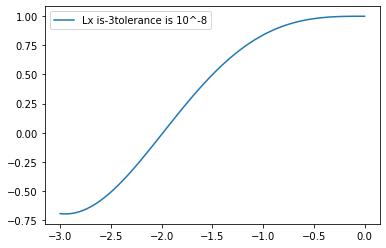

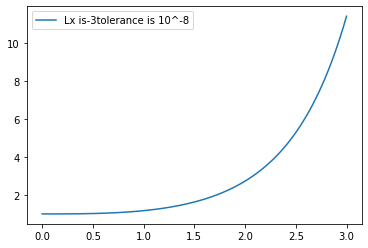

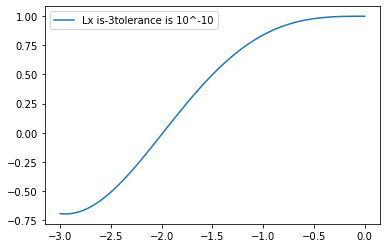

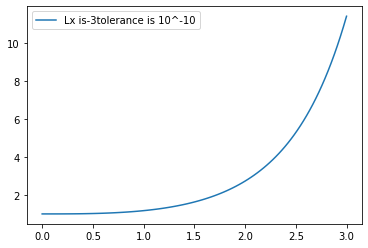

<ipython-input-41-b0c53428c2b7>:16: RuntimeWarning: overflow encountered in double_scalars
  y2 += cm(m) * x**(3*m)
<ipython-input-41-b0c53428c2b7>:16: RuntimeWarning: invalid value encountered in double_scalars
  y2 += cm(m) * x**(3*m)


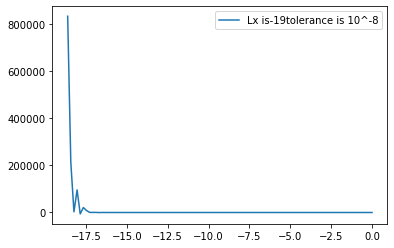

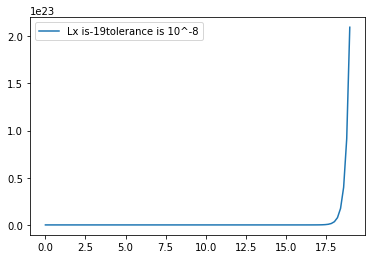

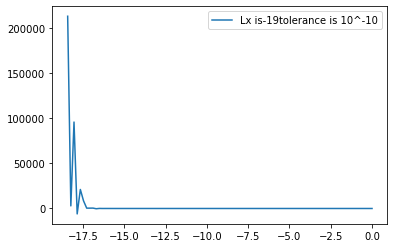

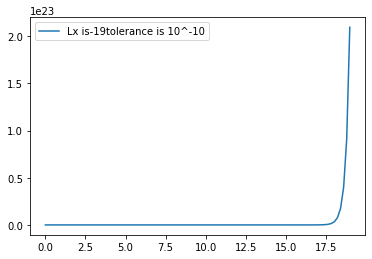

In [59]:
#Solution for Problem 2b

Lx3 = 3 
Lx19 = 19

x1 = np.linspace(-Lx3, 0, 100)
x2 = np.linspace(0, Lx3, 100)

val1 = 10**-8
val2 = 10**-10

y = []
y2 = []
y3 = []
y4 = []

for jj in range(len(x1)):
    y.append(y1(x1[jj], val1))
    y2.append(y1(x2[jj], val1))
    y3.append(y1(x1[jj], val2))
    y4.append(y1(x2[jj], val2))
    
plt.plot(x1, y)
plt.legend(["Lx is" + str(-Lx3) + "tolerance is 10^-8"])
plt.show()

plt.plot(x2, y2)
plt.legend(["Lx is" + str(-Lx3) + "tolerance is 10^-8"])
plt.show()

plt.plot(x1, y3)
plt.legend(["Lx is" + str(-Lx3) + "tolerance is 10^-10"])
plt.show()

plt.plot(x2, y4)
plt.legend(["Lx is" + str(-Lx3) + "tolerance is 10^-10"])
plt.show()

x1 = np.linspace(-Lx19, 0, 100)
x2 = np.linspace(0, Lx19, 100)

val1 = 10**-8
val2 = 10**-10

y = []
y2 = []
y3 = []
y4 = []

for jj in range(len(x1)):
    y.append(y1(x1[jj], val1))
    y2.append(y1(x2[jj], val1))
    y3.append(y1(x1[jj], val2))
    y4.append(y1(x2[jj], val2))
    
plt.plot(x1, y)
plt.legend(["Lx is" + str(-Lx19) + "tolerance is 10^-8"])
plt.show()

plt.plot(x2, y2)
plt.legend(["Lx is" + str(-Lx19) + "tolerance is 10^-8"])
plt.show()

plt.plot(x1, y3)
plt.legend(["Lx is" + str(-Lx19) + "tolerance is 10^-10"])
plt.show()

plt.plot(x2, y4)
plt.legend(["Lx is" + str(-Lx19) + "tolerance is 10^-10"])
plt.show()

**Problem 3**: (3 points) - If we list all the natural numbers below 15 that are multiples of 4 or 7, we get 4, 7, 8, 12, 14.  The sum of these multiples is 45.  Find the sum of all multiples of 4 or 7 below 162.  Note, you will need to make use of the mod command `%`, which in effect finds remainders from division.  Note the use below. Likewise you will also need to use the logical operation `or`. 

In [ ]:
# How to use %

print(1%2)
print(2%2)
print(3%2)
print(4%2)
print()
print(11%5)
print(12%5)
print(13%5)
print(14%5)
print(15%5)

In [60]:
#Solution for Problem 3: code

n = 162
sum = 0 

for ii in range (1, n):
    if ii%4 == 0 or ii%7 == 0:
        sum += ii
        
print(sum)

4792


**Problem 4**: (4 points) - Using a for loop based approach, write a program which finds 

$$
y(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{4} + 3\left(\frac{j}{n}\right)^{2} \right)
$$

for any positive integer n.  Generate a labeled plot of the results of your function for $1\leq n \leq 100$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph. 

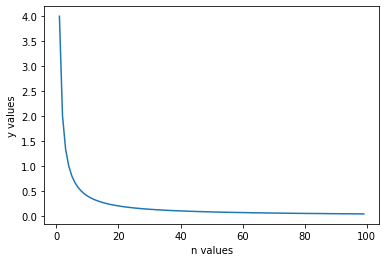

In [62]:
#Solution for Problem 4: code

n >= 1
j = 1

nvals = list(range(1, 100))
yvals = []

for n in range(1, 100):
    for j in range(1, n+1):
        y = (1/n)*((j/n)**4 + 3*(j/n)**2)
    y = round(y, 3)
    yvals.append(y)
    
plt.plot(nvals, yvals)
plt.xlabel("n values")
plt.ylabel("y values")
plt.show()

**Problem 5** ( 6 points)

[a]  -Suppose that

$$
P_{n}(x) = \sum_{k=0}^{n}\frac{n!}{k!(n-k)!}\frac{(-1)^k}{k!} x^{k}, ~ -5\leq x \leq 10.
$$

 Write a python function to compute $P_{n}(x)$ , where $n>=1$, use a `for`-loop, vectorized, recursive approach. 

[b]   Generate a plot showing $P_{n}(x)$ for $n=0,1,2,3,4$ on the same graph. Use different colors for each different $n$. You should provide a legend and labeled the axes.   

[c]  Provide an expression for $P_{0}(x)$, $P_{1}(x)$ and $P_{2}(x)$; this can be obtained by replacing $n$ with $0$, $1$ and $2$ respectively in $P_{n}(x)$ above. Compare your expression for $P_{0}(x)$, $P_{1}(x)$ and $P_{2}(x)$ with the graph you generate in part b above. Discuss if the graph is consistent with your expression for $P_{0}(x)$, $P_{1}(x)$ and $P_{2}(x)$.

In [6]:
#Solution for Problem 5a: code

def P(n, x):
    k = np.linspace(1, n, n)
    tot = 1
    kk = 1
    for i in k:
        kk *= (-x*(n-j))/i**2
        tot += kk 
    return tot

In [7]:
#Solution for Problem 5b: code

x = np.linspace(-5, 10, 100)
n_0 = [P(0, x) for x in x]
n_1 = [P(1, x) for x in x]
n_2 = [P(2, x) for x in x]
n_3 = [P(3, x) for x in x]
n_4 = [P(4, x) for x in x]
     
plt.plot(x, n_0, label = "n = 0", color = "b", ls = "--")
plt.plot(x, n_1, label = "n = 1", color = "y")
plt.plot(x, n_2, label = "n = 2", color = "b")
plt.plot(x, n_3, label = "n = 3", color = "r")
plt.plot(x, n_4, label = "n = 4", color = "g")

plt.legend(loc = (-0.5, 0.5))
plt.xlabel("x values")
plt.ylabel("$P_{n}(x)$")
plt.xlim(-5, 10)
plt.ylim(-10e4, 10e4)
plt.show()

NameError: name 'j' is not defined

### Solution for Problem 5c ###

$$
\begin{align}
P_{n}(x) = & \sum_{k=0}^{n}\frac{n!}{k!(n-k)!}\frac{(-1)^k}{k!} x^{k}, ~ -5\leq x \leq 10\\
P_{0}(x) = & \sum_{k=0}^{0}\frac{0!}{k!(0-k)!}\frac{(-1)^k}{k!} x^{k} \\
= & 1 \\
P_{1}(x) = & \sum_{k=0}^{1}\frac{1!}{k!(1-k)!}\frac{(-1)^k}{k!} x^{k} \\
= & 1 - x \\
P_{2}(x) = & \sum_{k=0}^{2}\frac{2!}{k!(2-k)!}\frac{(-1)^k}{k!} x^{k} \\
= & 1
\end{align}
$$